<a id=top-page></a>

# Cost function analysis of Sandia flame data

In this notebook, we explore how the cost function, $\mathcal{L}$, changes with dimensionality for various PCA-based projections of Sandia flame data. The Sandia flame datasets can be found [here](https://tnfworkshop.org/data-archives/pilotedjet/ch4-air) under the Scalar Data pmCDEF.zip.

The analysis in this notebook is performed in the following steps:

- [Load the Sandia flame D data](#data)
- [Plot a 2D PCA projection of flame D data](#proj)
- [Load/compute variance data and compute corresponding cost](#variance)
- [Plot the cost over dimensionality for the various flame data and PCA scalings](#plot)

***

In [1]:
%run -i imports.py
%matplotlib inline
save_figures = False

<a id=data></a>
***
## Load the Sandia flame D data

We load and concatenate data at all available heights in the flame. 

[Go to the top](#top-page)

In [2]:
data_directory = '../data/'
flameD_folder = 'pmD.scat/'

heights = ['075.Yall','15.Yall','30.Yall','45.Yall','60.Yall','75.Yall']

for f in heights:
    df = pd.read_csv(data_directory+flameD_folder+'D'+f, skiprows=3, delim_whitespace=True)
    keys = list(df.keys()[1:-3])
    states = np.array(df[keys[0]])
    for k in keys[1:]:
        states = np.vstack((states,np.array(df[k])))
    if f==heights[0]:
        flame_data = states.T
    else:
        flame_data = np.vstack((flame_data, states.T))

print('number of observations:', flame_data.shape[0], 'dimensionality:', flame_data.shape[1])
print('original dimension names:', keys)


number of observations: 56992 dimensionality: 10
original dimension names: ['T(K)', 'YO2', 'YN2', 'YH2', 'YH2O', 'YCH4', 'YCO', 'YCO2', 'YOH', 'YNO']


<a id=proj></a>
***
## Plot a 2D PCA projection of flame D data

[Go to the top](#top-page)

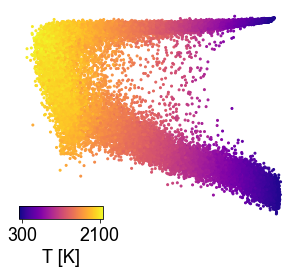

In [3]:
pcaobject = reduction.PCA(flame_data,'max',2)
eta = pcaobject.transform(flame_data)

fig = plt.figure(figsize=(5, 4))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
ax = fig.add_subplot(spec[0,0])
scat = plt.scatter(eta[:,0],eta[:,1],c=flame_data[:,0], s=4, cmap='plasma')
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
cbaxes = inset_axes(ax, width="30%", height="6%", loc='lower left')
cbar = plt.colorbar(scat, ticks=[300,2100], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('T [K]', fontsize=18, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(18)

if save_figures: plt.savefig('../figures/Sandia-flame-manifold.png', dpi=200, bbox_inches='tight')

<a id=variance></a>
***
## Load/compute variance data and compute corresponding cost

[Go to the top](#top-page)

Recompute the variance data or load precomputed data below.

<p style="color:green;">► You only need to run this once to generate the `csv` files in `../results/`:</p>

In [ ]:
# whichflame='D' # D or F

# savefolder = '../results/Sflame'+whichflame+'_variance_data/'

# data_directory = '../data/'

# ### load data

# folder = 'pm'+whichflame+'.scat/'
# heights = ['075.Yall','15.Yall','30.Yall','45.Yall','60.Yall','75.Yall']
# for f in heights:
#     df = pd.read_csv(data_directory+folder+whichflame+f, skiprows=3, delim_whitespace=True)
#     keys = list(df.keys()[1:-3])
#     states = np.array(df[keys[0]])
#     for k in keys[1:]:
#         states = np.vstack((states,np.array(df[k])))
#     if f==heights[0]:
#         flame_data = states.T
#     else:
#         flame_data = np.vstack((flame_data, states.T))

# ### set parameters for cost function (bandwidth values and dependent variables)

# bandwidth_values = np.logspace(-8, 3, 600)

# selection = [0, 1, 3, 4, 5, 6, 7] # variable indices to compute cost function on
# depvars = flame_data[:,selection]
# depvar_names = np.array(keys)[selection]
# print('dependent variables for cost:', depvar_names)

# ### compute cost for PCA projections of data

# for scaling in ['max', '0to1']:
#     for ndim in [1, 2, 3, 4, 5, 10]:
#         print(scaling, ndim)

#         filename = scaling+'_'+str(ndim)+'_Sflame'+whichflame

#         pca = reduction.PCA(flame_data,scaling,ndim)
#         PCs = pca.transform(flame_data,nocenter=False)

#         tic = time.perf_counter()
#         variance_data = analysis.compute_normalized_variance(PCs,
#                                                             depvars,
#                                                             depvar_names=depvar_names,
#                                                             bandwidth_values=bandwidth_values,
#                                                             )
#         toc = time.perf_counter()
#         pickle.dump( variance_data, open( savefolder+filename+'.pkl', "wb" ) )
#         print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

# ### compute cost for original dimensionality

# filename = 'original_'+str(flame_data.shape[1])+'_Sflame'+whichflame
# tic = time.perf_counter()
# variance_data = analysis.compute_normalized_variance(flame_data,
#                                                     depvars,
#                                                     depvar_names=depvar_names,
#                                                     bandwidth_values=bandwidth_values,
#                                                     )
# toc = time.perf_counter()
# pickle.dump( variance_data, open( savefolder+filename+'.pkl', "wb" ) )
# print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)


Compute costs for the projections of Sandia flame D and F data

In [5]:
flameD_variance_folder = '../results/SflameD_variance_data/'
flameF_variance_folder = '../results/SflameF_variance_data/'

pca_scalings = ['max', '0to1'] # scalings
ndims = [1, 2, 3, 4, 5, 10] # dimensionality

flameD_weighted_areas = {}
flameF_weighted_areas = {}

for k in pca_scalings:
    flameD_weighted_areas[k] = []
    flameF_weighted_areas[k] = []

for i in ndims:
    print(f'{i}D PCA')
    for ky in pca_scalings:
        print(f'  {ky} scaling')
        
        variance_data = pickle.load( open( flameD_variance_folder+ky+"_"+str(i)+"_SflameD.pkl", "rb" ) )
        area_log_sigma_peak = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                                    penalty_function='log-sigma-over-peak', 
                                                                                    norm=None, 
                                                                                    integrate_to_peak=False)
        area_log_sigma_peak = np.linalg.norm(area_log_sigma_peak, 1)
        flameD_weighted_areas[ky].append(area_log_sigma_peak)
        print(f'    flame D cost: {area_log_sigma_peak:.2f}')

        ################################

        variance_data = pickle.load( open( flameF_variance_folder+ky+"_"+str(i)+"_SflameF.pkl", "rb" ) )
        area_log_sigma_peak = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                                    penalty_function='log-sigma-over-peak', 
                                                                                    norm=None, 
                                                                                    integrate_to_peak=False)
        area_log_sigma_peak = np.linalg.norm(area_log_sigma_peak, 1)
        flameF_weighted_areas[ky].append(area_log_sigma_peak)
        print(f'    flame F cost: {area_log_sigma_peak:.2f}')


1D PCA
  max scaling
    flame D cost: 33.22
    flame F cost: 34.03
  0to1 scaling
    flame D cost: 28.60
    flame F cost: 28.75
2D PCA
  max scaling
    flame D cost: 7.07
    flame F cost: 7.77
  0to1 scaling
    flame D cost: 9.87
    flame F cost: 11.95
3D PCA
  max scaling
    flame D cost: 6.56
    flame F cost: 6.86
  0to1 scaling
    flame D cost: 7.69
    flame F cost: 8.72
4D PCA
  max scaling
    flame D cost: 6.43
    flame F cost: 6.62
  0to1 scaling
    flame D cost: 6.79
    flame F cost: 7.10
5D PCA
  max scaling
    flame D cost: 6.40
    flame F cost: 6.59
  0to1 scaling
    flame D cost: 6.66
    flame F cost: 6.85
10D PCA
  max scaling
    flame D cost: 6.43
    flame F cost: 6.63
  0to1 scaling
    flame D cost: 6.63
    flame F cost: 6.82


Compute costs for the original 10-dimensional Sandia flame D and F data

In [6]:
variance_data = pickle.load( open( flameD_variance_folder+"original_10_SflameD.pkl", "rb" ) )     
area_log_sigma_peak_orig = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                            penalty_function='log-sigma-over-peak', 
                                                                            norm=None, 
                                                                            integrate_to_peak=False)
flameD_weighted_area_orig = np.linalg.norm(area_log_sigma_peak_orig, 1)
print(f'original flame D cost: {flameD_weighted_area_orig:.2f}')

################################

variance_data = pickle.load( open( flameF_variance_folder+"original_10_SflameF.pkl", "rb" ) )
area_log_sigma_peak_orig = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                                            penalty_function='log-sigma-over-peak', 
                                                                            norm=None, 
                                                                            integrate_to_peak=False)
flameF_weighted_area_orig = np.linalg.norm(area_log_sigma_peak_orig, 1)
print(f'original flame F cost: {flameF_weighted_area_orig:.2f}')


original flame D cost: 6.89
original flame F cost: 7.20


<a id=plot></a>
***
## Plot the cost over dimensionality for the various flame data and PCA scalings

[Go to the top](#top-page)

imports.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".--" (-> marker='.'). The keyword argument will take precedence.
  from PCAfold import reduction
imports.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".--" (-> marker='.'). The keyword argument will take precedence.
  from PCAfold import analysis


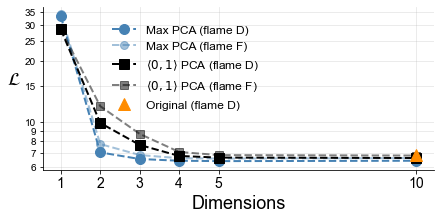

In [7]:
colors = ['steelblue','k','r','purple']
markers = ['o', 's', '^', '*', 'D']

fig = plt.figure(figsize=(7, 3))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
ax = fig.add_subplot(spec[0,0])

for ik, k in enumerate(pca_scalings):
    if k=='0to1':
        lb = '$\\langle 0, 1 \\rangle$'+' PCA'
    else:
        lb = k.capitalize()+' PCA'
    ax.plot(ndims, flameD_weighted_areas[k], '.--', marker=markers[ik], c=colors[ik], lw=2, markersize=10, label=lb+' (flame D)')
    ax.plot(ndims, flameF_weighted_areas[k], '.--', marker=markers[ik], c=colors[ik], alpha=0.5, lw=2, markersize=8, label=lb+' (flame F)')

ax.plot([10], flameD_weighted_area_orig, '^', c='darkorange', lw=2.5, markersize=12, label='Original (flame D)')
# ax.plot([10], flameF_weighted_area_orig, '^', c='darkorange', lw=2.5, markersize=8, alpha=0.3, label='Original F')

plt.xticks(ndims, fontsize=14)
ax.set_yscale('log')
ax.set_yticks([6,7,8,9,10,15,20,25,30,35])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([5.8,37])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.grid(alpha=0.3, zorder=0)
plt.xlabel('Dimensions', fontsize=18)
plt.ylabel('$\mathcal{L}$', fontsize=18, rotation=0, horizontalalignment='right')
plt.legend(bbox_to_anchor=(0.15,0.3), frameon=False, fontsize=12)

if save_figures: plt.savefig('../figures/Sandia-flame-costs-vs-increasing-dimensionality.svg', dpi=200, bbox_inches='tight')

***